# generate_countries.ipynb

Generate time series data (mobility/mortality) for countries based on simple control point lists.

Exports Excel files.
To be used with the `savaris_covid.ipynb` processing pipeline.

**Attention:** 

a) For the datasets in the `datasets/` folder, I forgot to set a seed for the RNG. Therefore, these are slightly different from the datasets generated on each run of this notebook. 

b) This notebook creates Excel files in the current folder, whereas the `savaris_covid.ipynb` loads the files from the dataset folder. This is by design to avoid inadvertent modifications.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
from pylab import polyfit

In [2]:
np.random.seed(0)

## Generate model/random countries

In [3]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    copy = iterable[1:]    
    return zip(iterable, copy)

In [4]:
def make_country(name, mobility_changes, mortality_changes, wobble=1.0):
        epi_week = range(8,35)
        mortality = np.zeros(27)
        mobility =  np.zeros(27)
        for (now, val1), (then, val2) in pairwise(mobility_changes):
            for i in range(now, then+1):
                mobility[i] = val1 + ((i-now) * (val2 - val1) / (then - now))
        for (now, val1), (then, val2) in pairwise(mortality_changes):
            for i in range(now, then+1):
                mortality[i] = val1 + ((i-now) * (val2 - val1) / (then - now))
        mortality = mortality + np.random.rand(27) * wobble
        mobility = mobility + np.random.rand(27) * wobble
        plt.plot(epi_week, mobility)
        plt.plot(epi_week, mortality)
        plt.ylabel("decrease in mobility compared to baseline (blue)\ndeaths per million (orange)")
        plt.xlabel("epidemiological week")
        plt.title(name)
        plt.show()
        #plt.scatter(mobility, mortality)
        #plt.show()
        country = [name] * 27
        df = pd.DataFrame(list(zip(country,epi_week,epi_week,mobility,mortality)), columns = ['location', 'epi-week', 'date', 'Stay-at-home', 'new_deaths_per_million'])
        return df

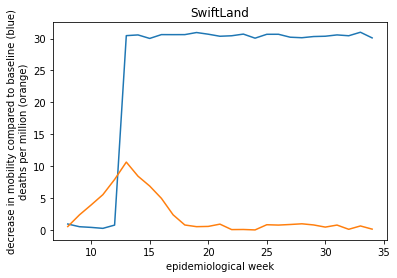

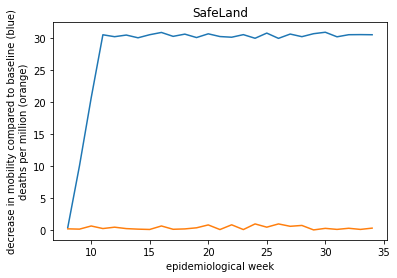

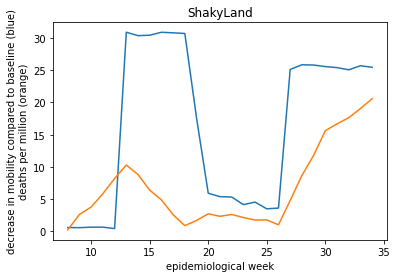

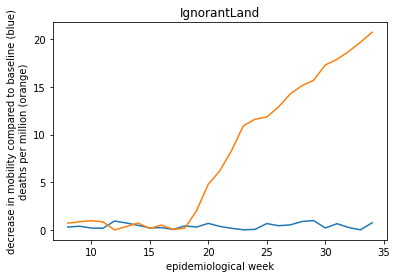

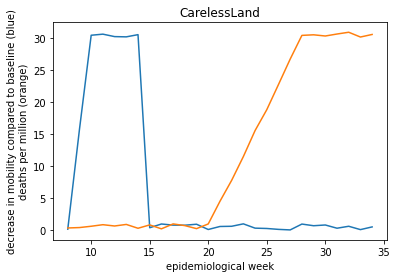

In [5]:
good1 = make_country("SwiftLand", [(0,0), (4,0), (5, 30), (26,30)], [(0,0), (3,5), (5,10), (10,0)])
good2 = make_country("SafeLand", [(0,0), (3, 30), (26,30)], [(0,0), (26,0)])
medium1 = make_country("ShakyLand", [(0,0), (4,0), (5, 30), (10,30), (12,5), (18,3), (19,25), (26,25)], [(0,0), (3,5), (5,10), (10,0),(12,2), (18,1), (22,15), (26,20)])
bad1 = make_country("IgnorantLand", [(0,0), (26, 0)], [(0,0), (10,0), (15,10), (26,20)])
bad2 = make_country("CarelessLand", [(0,0), (2,30), (6, 30), (7, 0), (26, 0)], [(0,0), (12,0), (20,30), (26,30)])


In [6]:
df = pd.concat([good1,good2,medium1,bad1,bad2])
df.to_excel(r'CovidSavaris_Test_only_working_lockdown_with_wobble.xlsx')

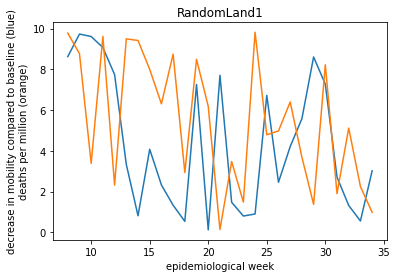

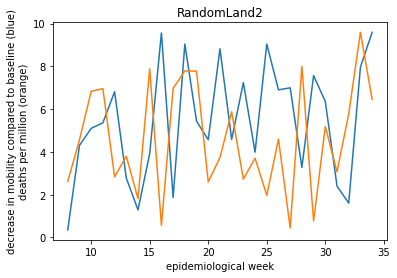

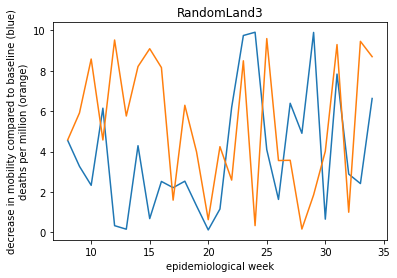

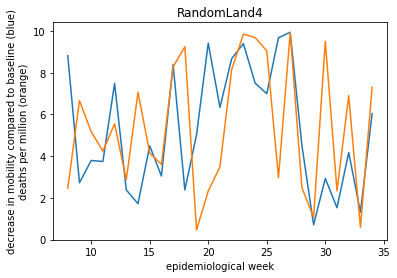

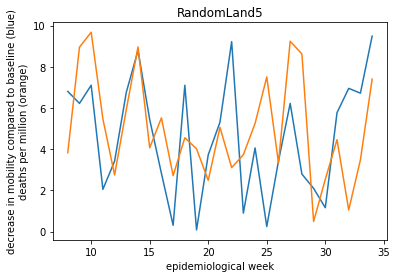

In [7]:
rand1 = make_country("RandomLand1", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)
rand2 = make_country("RandomLand2", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)
rand3 = make_country("RandomLand3", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)
rand4 = make_country("RandomLand4", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)
rand5 = make_country("RandomLand5", [(0,0), (26,0)], [(0,0), (26,0)], wobble=10)

In [8]:
df = pd.concat([rand1,rand2,rand3,rand4,rand5])
df.to_excel(r'CovidSavaris_Test_only_random.xlsx')

## Generate datasets by R.F. Savaris
According to R.F. Savaris, these (hypothetical) datasets represent two countries where reduction in moility obviously has an effect on mortality, and where the method by Savaris et al. returns a statistically significant correlation.

In [9]:
# Dataset obtained via email from R.F. Savaris
savaris1_data = {'name': "Stay Inn Area",
            'mortality': [1000,1000,1010,960,912,866,823,782,742,705,670,637,605,
                     574,546,518,493,468,445,422,401,381,362,344,327,310,295],
            'mobility': [20,20,20,21,21,21,22,22,22,23,23,23,24,24,24,25,25,25,26,26,27,27,27,28,28,29,29]
                }

savaris2_data = {'name': "Get Out Valley",
                 'mortality': [1000,1000,1005,1055,1108,1163,1222,1283,1347,1414,1485,1559,1637,
                     1719,1805,1895,1990,2089,2194,2303,2419,2540,2667,2800,2940,3087,3241],
                 'mobility': [-5,-5,-6,-6,-7,-7,-8,-9,-10,-11,-12,-13,-14,-16,-17,-19,-21,-23,-25,-28,-31,-34,-37,-41,-45,-49,-54]
                }  
                 
def make_savaris(dataset, mobility_noise = 0, mortality_noise=0):
        name = dataset['name']
        if mobility_noise > 0 or mortality_noise > 0:
            name += " (+noise)"
        epi_week = range(8,35)
        mortality = dataset['mortality'] + np.random.rand(27) * mortality_noise
        mobility = dataset['mobility'] + np.random.rand(27) * mobility_noise
        plt.plot(epi_week, mobility)
        plt.plot(epi_week, mortality)
        plt.ylabel("decrease in mobility compared to baseline (blue)\ndeaths per million (orange)")
        plt.xlabel("epidemiological week")
        plt.title(name)
        plt.show()
        #plt.scatter(mobility, mortality)
        #plt.show()
        country = [name] * 27
        df = pd.DataFrame(list(zip(country,epi_week,epi_week,mobility,mortality)), columns = ['location', 'epi-week', 'date', 'Stay-at-home', 'new_deaths_per_million'])
        return df

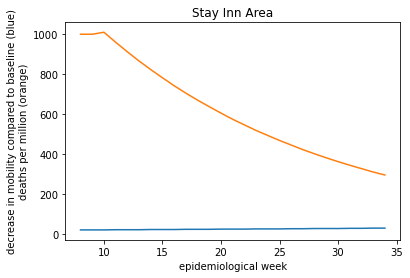

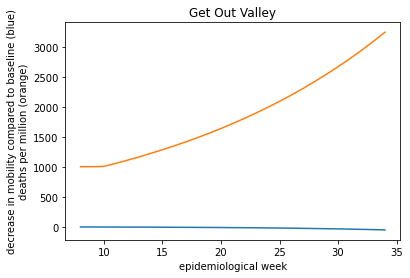

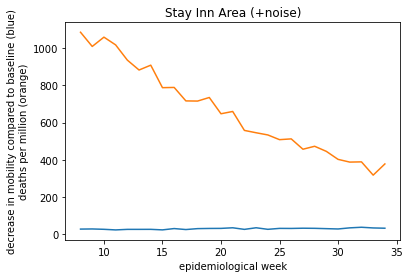

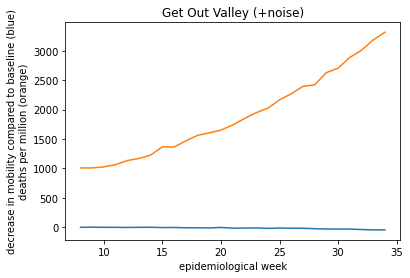

In [10]:
savaris1 = make_savaris(savaris1_data)
savaris2 = make_savaris(savaris2_data)
savaris1a = make_savaris(savaris1_data, 10.0, 100.0)
savaris2a = make_savaris(savaris2_data, 10.0, 100.0)

In [11]:
df = pd.concat([savaris1, savaris2])
df.to_excel(r'CovidSavaris_Test_Savaris_PoC.xlsx')
df = pd.concat([savaris1a, savaris2a])
df.to_excel(r'CovidSavaris_Test_Savaris_PoC_noisy.xlsx')

## Bonus: Regression

Calculate the regression according to Savaris et al. and perform test for null hypothesis.

> "The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis."
[source](https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients)

That means, that we test whether the slope is non-zero - i.e., that there is some correlation between (differences in) mobility/mortality.

**Attention**: This code returns slightly different p-values than the script by Savaris et al. (possibly due to differences in how the difference is calculated). This is just a convenience function to quickly check whether some correlation between two datasets should be expected.

In [12]:
# plot regression
def compare_two(df1, df2):
    plt.scatter(df1['Stay-at-home'], df1['new_deaths_per_million'])
    plt.xlabel("change in decrease in mobility compared to previous week")
    plt.ylabel("change in deaths per million/week\ncompared to previous week")
    plt.title(df1['location'][0])
    #plt.xlim(0,30)
    #plt.ylim(0,30)
    plt.show()
    plt.scatter(df2['Stay-at-home'], df2['new_deaths_per_million'])
    plt.xlabel("change in decrease in mobility compared to previous week)")
    plt.ylabel("change in deaths per million/week\ncompared to previous week")
    plt.title(df2['location'][0])
    #plt.xlim(0,30)
    #plt.ylim(0,30)
    plt.show()
    #plt.scatter(df['Stay-at-home'].diff(), df['new_deaths_per_million'].diff())
    smooth_mob1, smooth_mort1 = df1['Stay-at-home'].diff(), df1['new_deaths_per_million'].diff()
    smooth_mob2, smooth_mort2 = df2['Stay-at-home'].diff(), df2['new_deaths_per_million'].diff()
    mob_diff = smooth_mob1 - smooth_mob2
    mob_diff = mob_diff.dropna()
    mort_diff = smooth_mort1 - smooth_mort2
    mort_diff = mort_diff.dropna()
    plt.scatter(mob_diff, mort_diff)
    mob_a = np.array(mob_diff) #this will convert a list in to an array
    mort_a = np.array(mort_diff)
    m,b = polyfit(mob_a, mort_a, 1) 
    plt.plot(mob_a, m*mob_a+b, '-r')
    x = sm.add_constant(mob_diff.values)
    res = sm.OLS(mort_diff,x).fit() 
    plt.xlabel("difference of change in decrease in mobility compared to previous week")
    plt.ylabel("difference of change in deaths per million/week\ncompared to previous week")
    plt.title("%s - %s\n→ p = %.5f" % (df1['location'][0], df2['location'][0], res.pvalues[1]))
    plt.show()
    return res.pvalues[1]

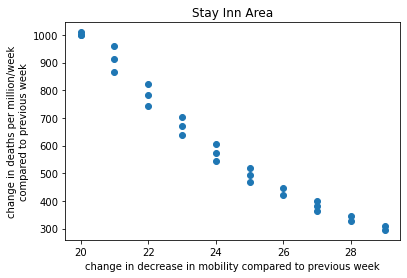

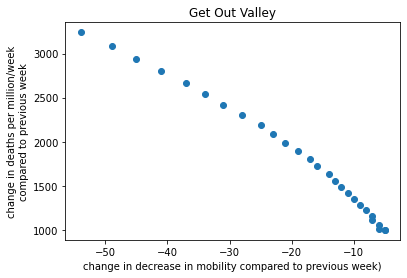

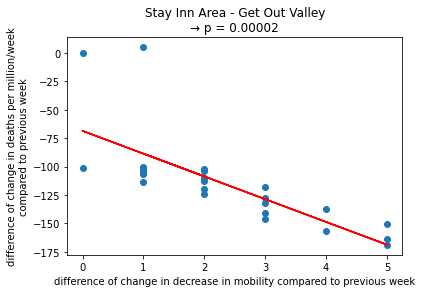

p = 1.53328e-05


In [13]:
p_x = compare_two(savaris1,savaris2)
print(f"p = {p_x:.6}")